Using TensorFlow backend.


(106, 27)
Epoch 1/10
3s - loss: 0.0217
Epoch 2/10
1s - loss: 0.0202
Epoch 3/10
1s - loss: 0.0208
Epoch 4/10
1s - loss: 0.0202
Epoch 5/10
1s - loss: 0.0209
Epoch 6/10
1s - loss: 0.0213
Epoch 7/10
1s - loss: 0.0211
Epoch 8/10
1s - loss: 0.0215
Epoch 9/10
1s - loss: 0.0193
Epoch 10/10
1s - loss: 0.0201
percentage error for iteration 0 : 9.99
Epoch 1/10
1s - loss: 0.0211
Epoch 2/10
1s - loss: 0.0199
Epoch 3/10
1s - loss: 0.0214
Epoch 4/10
1s - loss: 0.0213
Epoch 5/10
1s - loss: 0.0204
Epoch 6/10
1s - loss: 0.0202
Epoch 7/10
1s - loss: 0.0241
Epoch 8/10
1s - loss: 0.0202
Epoch 9/10
1s - loss: 0.0201
Epoch 10/10
1s - loss: 0.0203
percentage error for iteration 1 : 35.96
Epoch 1/10
1s - loss: 0.0204
Epoch 2/10
1s - loss: 0.0207
Epoch 3/10
1s - loss: 0.0206
Epoch 4/10
1s - loss: 0.0213
Epoch 5/10
1s - loss: 0.0206
Epoch 6/10
1s - loss: 0.0214
Epoch 7/10
1s - loss: 0.0202
Epoch 8/10
1s - loss: 0.0197
Epoch 9/10
1s - loss: 0.0199
Epoch 10/10
1s - loss: 0.0199
percentage error for iteration 2 : 2

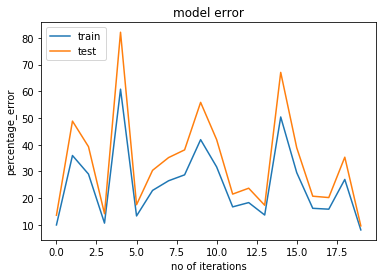

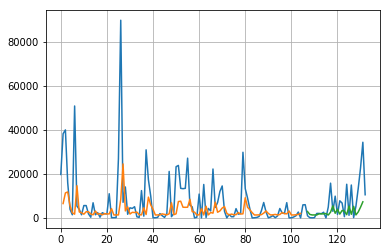

In [1]:
import numpy 
import pandas
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import optimizers

no_of_iteration=20
numpy.random.seed(7)
dataframe = pandas.read_csv('vendor_payments.csv',usecols=[1],engine='python',skipfooter =3)
dataset = dataframe.values
dataset = dataset.astype('float32')
max_d = max(dataset)
dataset = dataset/max(dataset)

train_size = int(len(dataset)*0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size],dataset[train_size:len(dataset)]
print(len(train),len(test))

def create_dataset(dataset, step_size =1):
	X_data,Y_data = [],[]
	for i in range(len(dataset)-n-1):
		a = dataset[i:(i+n),0]
		b = dataset[i+n,0]
		X_data.append(a)
		Y_data.append(b)
	return numpy.array(X_data),numpy.array(Y_data)

n=1
x_train,y_train = create_dataset(train,n)
x_test, y_test = create_dataset(test,n)
x_train = numpy.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = numpy.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
#print(x_test)

model = Sequential()
model.add(LSTM(1000, return_sequences=True,input_shape=(1,1)))
# model.add(Dropout(0.3))
model.add(LSTM(32, return_sequences=False))
# model.add(Dense(1000,activation='relu'))
model.add(Dense(1,activation='linear'))
# model.compile(loss='mean_squared_error', optimizer='adam')
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

list_error_train = []
list_error_test=[]
for epoches in range(no_of_iteration):
	model.fit(x_train, y_train, batch_size=10, verbose=2)
	train_percentage_error =0
	test_percentage_error = 0
	trainPredict = model.predict(x_train)
	trainPredict = trainPredict*max_d
	testPredict = model.predict(x_test)
	testPredict = testPredict*max_d
	for i in range(len(y_train)): 
		train_percentage_error += abs(trainPredict[i]-(y_train[i]*max_d))/(y_train[i]*max_d)
	for i in range(len(y_test)): 
		test_percentage_error += abs(testPredict[i]-(y_test[i]*max_d))/(y_test[i]*max_d)
	train_percentage_error = train_percentage_error/(len(y_train))
	test_percentage_error = test_percentage_error/(len(y_test))
	list_error_train.append(train_percentage_error)
	list_error_test.append(test_percentage_error)
	print ('percentage error for iteration %d : %.2f'%(epoches,train_percentage_error))



trainScore = model.evaluate(x_train, y_train, verbose=0)
print("MSE train data= ",trainScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('MSE test data= ',testScore)

# generate predictions
trainPredict = model.predict(x_train)
trainPredict = trainPredict*max_d
testPredict = model.predict(x_test)
testPredict = testPredict*max_d

train_percentage_error = 0
test_percentage_error = 0
for i in range(len(y_train)): 
	train_percentage_error += abs(trainPredict[i]-(y_train[i]*max_d))/(y_train[i]*max_d)
for i in range(len(y_test)): 
	test_percentage_error += abs(testPredict[i]-(y_test[i]*max_d))/(y_test[i]*max_d)
train_percentage_error = train_percentage_error/(len(y_train))
test_percentage_error = test_percentage_error/(len(y_test))
print ('percentage error train =',train_percentage_error)
print ('percentage error test =',test_percentage_error)
# for i in range(len(y_train)):
# 	print x_train[i]*max_d
# 	print y_train[i]*max

# for i in range (len(y_train)):
# 	print(trainPredict[i])

#########------------------------------analyse data using graphs--------------------------------------------------------##########
#error values
plt.plot(list_error_train)
plt.plot(list_error_test)
plt.xlabel('no of iterations')
plt.ylabel('percentage_error')
plt.title('model error')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#data_set
plt.plot(dataframe)
look_back=1
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.grid(True)
plt.show()
